# Exercises day 02 - 2


In [1]:
import numpy as np
import matplotlib.pyplot as plt

NUMS_TO_GENERATE = 10 ** 4

def exppdf(x : float, lam :float) -> float:
    """
        Exponential distribution probability density function.
        
        :param x: x value
        :param lam: lambda
        
        :return: probability density function value
    """
    return  lam * np.exp(-lam*x)

def normpdf(x : float, mu : float, sigma : float) -> float:
    """
        Normal distribution probability density function.
        
        :param x: x value
        :param mu: mean
        :param sigma: standard deviation
        
        :return: probability density function value
    """
    return 1/(np.sqrt(2 * np.pi) * sigma) * np.exp(-1.0 / 2 * ((mu - x) / sigma)**2)

In [2]:
def plot_dist_hist() -> None:
    pass

## Ex01
**Generate simulated values from different distributions**

### a) Exponential


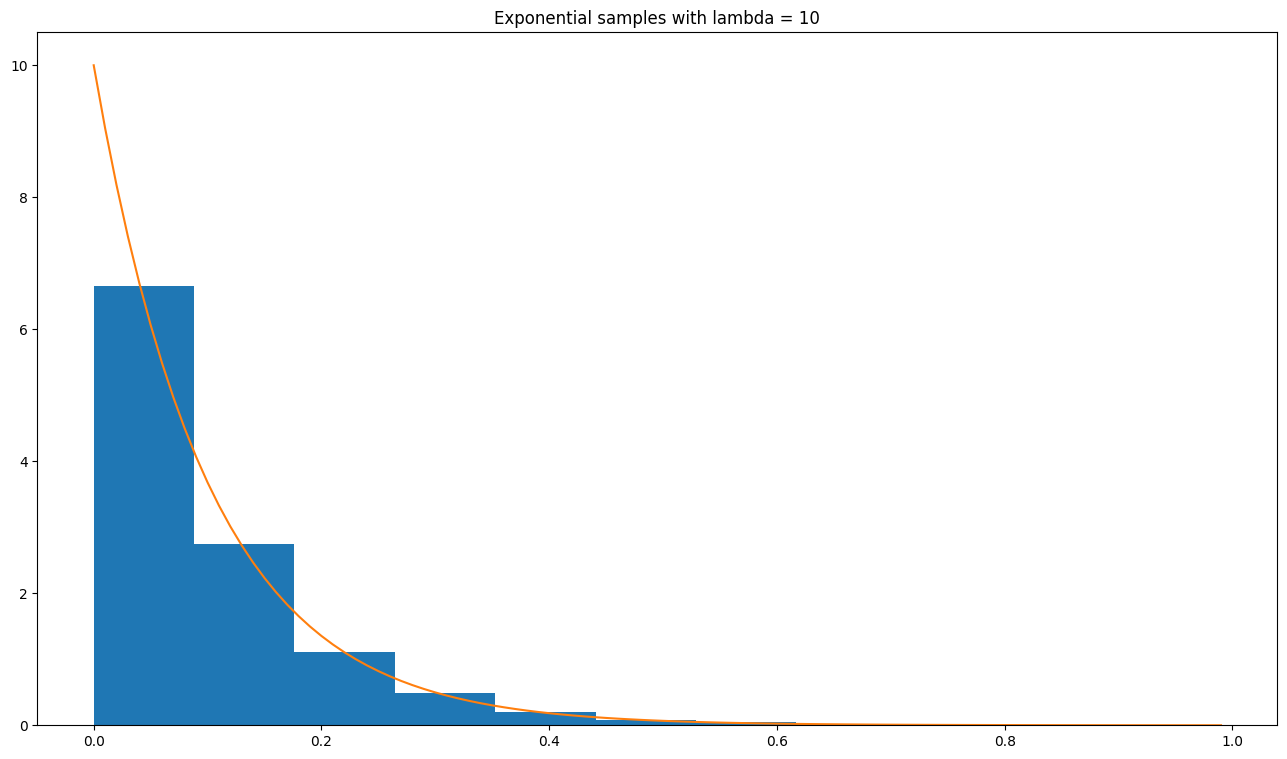

In [3]:
# Sample Uniform distribution
U = np.random.uniform(0.0, 1.0, NUMS_TO_GENERATE)

# Exponential distribution
lambda_ = 10 
X = -np.log(U)/lambda_ 

# Plots
XX =np.arange(0, 1, 0.01)
Y=np.array([exppdf(x, lambda_) for x in XX])
plt.figure(figsize=(16, 9))
plt.title(f"Exponential samples with lambda = {lambda_}")
plt.hist(X, density=True)
plt.plot(XX, Y)
plt.show()

### b) Normal (Box-Mueller)

In [4]:
def box_mueller_adv(num_samples : int) -> list[float]:
    """
        Here we used the smart method which Bo introduced on slide 16 of the third lecture.
        (See slide 16 of 'slide4m1.pdf')
        NOTE: due to the nature of finding two samples at a time, the number of samples must be even.
        If the number of samples isn't even then the function will return a list of num_samples + 1.
        (e.g if num_samples = 5, then the function will return 6 samples)
        
        :param num_samples: number of samples to generate.
        
        :return: list of samples.
    """
    counter = 0
    
    accepted = []
    U_1 = np.random.uniform(0.0, 1.0, num_samples)
    V = np.random.uniform(-1.0, 1.0, (2, num_samples))
    
    i = 0
    while counter < num_samples:
        V_1 = V[0][i]
        V_2 = V[1][i]
        R_squared = V_1**2 + V_2**2
        if R_squared <= 1:
            # We accept the samples (and calculate them as per slides)
            coeff = np.sqrt(-2 * np.log(U_1[i]))
            R = np.sqrt(R_squared)
            Z_1 = coeff * V_1 / R 
            Z_2 = coeff * V_2 / R
            accepted.append(Z_1); accepted.append(Z_2)
            counter += 2
        if i == num_samples - 1:
            # We generate new samples if we run out
            i = 0
            U_1 = np.random.uniform(0.0, 1.0, num_samples)
            V = np.random.uniform(-1.0, 1.0, (2, num_samples))
        i += 1


    return accepted
        
        


**Plotting**

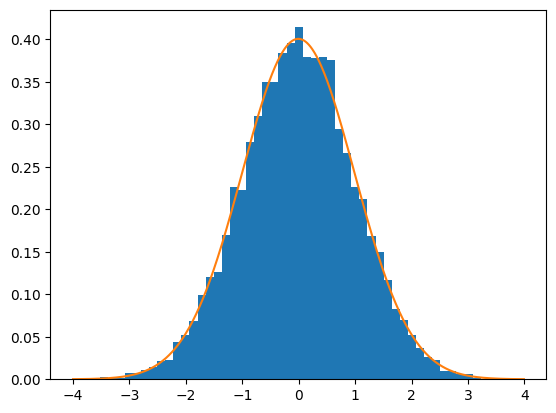

In [5]:
X = np.array(box_mueller_adv(NUMS_TO_GENERATE))

XX=  np.arange(-4, 4, 0.01)
Y=np.array([normpdf(x, X.mean(), X.std()) for x in XX])

plt.figure()
plt.hist(X, density=True, bins=50)
plt.plot(XX,Y)
plt.show()

In [6]:
def box_mueller(num_samples : int) -> list[float]:
    """
        Generate num_samples samples from a standard normal distribution, by the Box-Mueller method.
        NOTE: due to the nature of finding two samples at a time, the number of samples must be even.
        If the number of samples isn't even then the function will return a list of num_samples + 1.
        (e.g if num_samples = 5, then the function will return 6 samples)
        
        :param num_samples: The number of samples to generate.
        
        :return: A list of num_samples samples from a standard normal distribution.
    """
    n = (num_samples // 2 + 1)
    
    accepted = []
    U_1 = np.random.uniform(0.0, 1.0, n)
    U_2 = np.random.uniform(0.0, 1.0, n)
    
    for i in range(n):
        Z_1 = np.sqrt(-2 * np.log(U_1[i])) * np.cos(2 * np.pi * U_2[i])
        Z_2 = np.sqrt(-2 * np.log(U_1[i])) * np.sin(2 * np.pi * U_2[i])
        
        accepted.append(Z_1); accepted.append(Z_2)
        

    return accepted


**Plotting**

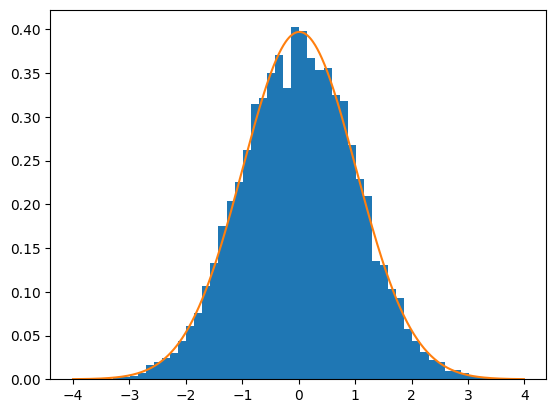

In [7]:
NUMS_TO_GENERATE = 10**4
X = np.array(box_mueller(NUMS_TO_GENERATE))

XX =  np.arange(-4, 4, 0.01)
Y = np.array([normpdf(x, X.mean(), X.std()) for x in XX])

plt.figure()
plt.hist(X, density=True, bins=50)
plt.plot(XX,Y)
plt.show()

Normal distribution with central limit theorem. 

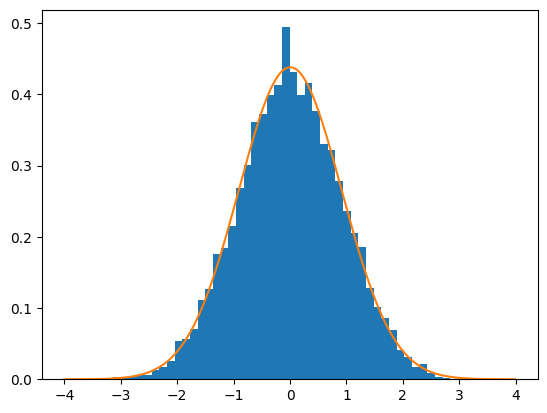

In [8]:
def norm_CLT(num_samples, n):
    # Sample Uniform distribution
    U = np.random.uniform(0.0, 1.0, (n, num_samples))

    X = np.sum(U, axis=0) - n/2

    return X

n = 10

X = norm_CLT(NUMS_TO_GENERATE,n)

# Plotting
XX=  np.arange(-4, 4, 0.01)
Y=np.array([normpdf(x, X.mean(), X.std()) for x in XX])

plt.figure()
plt.hist(X, density=True, bins=50)
plt.plot(XX,Y)
plt.show()



### c) Pareto distribution

In [9]:
def paretoPDF(x, k, beta):
    # Support [beta,inf[
    return (k*beta)/(x**(k+1))

def pareto_samples(k, beta, num_samples: int):
    U = np.random.uniform(0.0, 1.0,num_samples)
    X = beta*(U**(-1/k))

    return X

**Plotting**

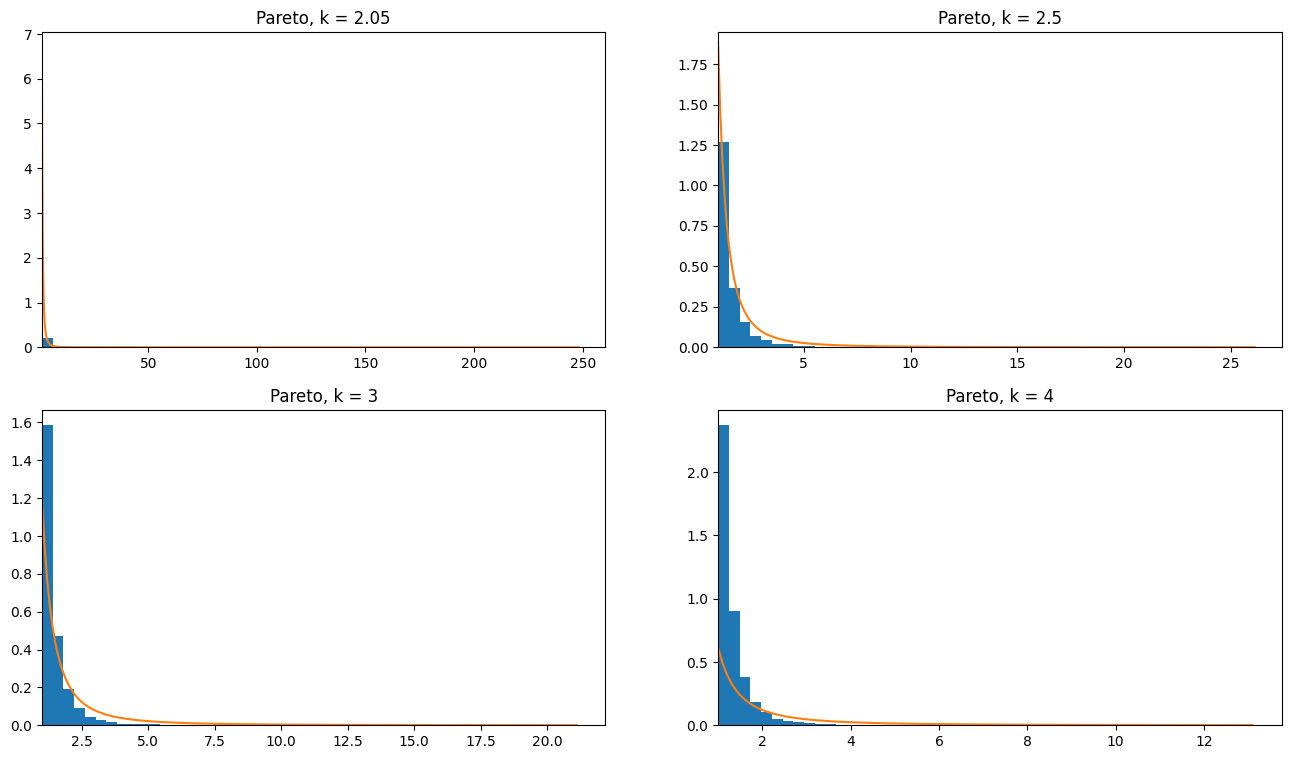

In [10]:
beta = 1
K = [2.05, 2.5, 3, 4]


plt.figure(figsize=(16, 9))
for i,k in enumerate(K):
    plt.subplot(2, 2, i + 1)
    X = pareto_samples(k,beta, NUMS_TO_GENERATE)

    XX=  np.arange(beta, X.max(), 0.1)
    Y=np.array([paretoPDF(x, X.mean(), X.std()) for x in XX])
 
    plt.title(f"Pareto, k = {k}")
    plt.hist(X,bins=50, density=True)
    plt.xlim(left=beta)
    plt.plot(XX,Y)

plt.show()

## Ex02: Pareto distribution

**For the Pareto distribution with support on $[\beta, \infty[$ compare mean value and variance, with analytical results, which can be calculated as E(X) = 'stuff'.
Var(X) = 'stuff'.**

We have by common decision (and by looking at slides) agreed that $k$ may assum real values.

In [11]:
NUM_Ks = 100
NUM_BETAs = 100

ks = np.linspace(2.05, 4, NUM_Ks)
betas = np.linspace(1, 10, NUM_BETAs)

pareto_means = np.zeros((NUM_Ks, NUM_BETAs))
pareto_vars = np.zeros_like(pareto_means) # <-- damn this is new, hella cool B)

pareto_E = lambda k, beta: beta * (k / (k - 1))
pareto_Var = lambda k, beta: beta**2 * (k) / ((k-1)**2 * (k-2))


for i, k in enumerate(ks):
    for j, beta in enumerate(betas):
        X = pareto_samples(k, beta, NUMS_TO_GENERATE)
        pareto_means[i, j] = np.abs(pareto_E(k, beta) -  X.mean())

        pareto_vars[i,j] = np.abs(pareto_Var(k, beta) - X.var())


**Plotting**

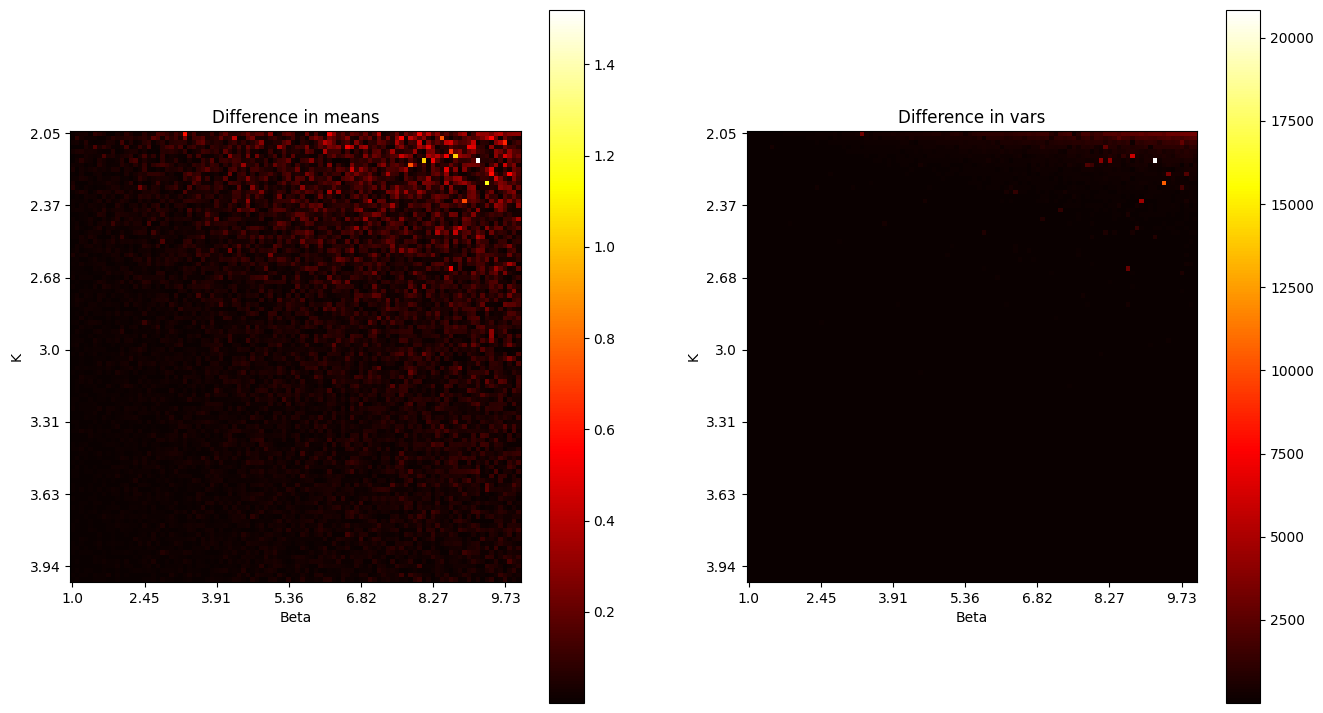

In [12]:
NUM_TICKS = 6
TICKS_ROUNDING = 2
TICKS_DIVISOR_X = NUM_Ks // NUM_TICKS
TICKS_DIVISOR_Y = NUM_BETAs // NUM_TICKS

xs = [round(beta, TICKS_ROUNDING) for beta in betas[::TICKS_DIVISOR_X]]
x_locs = range(NUM_Ks)[::TICKS_DIVISOR_X]

ys = [round(k, TICKS_ROUNDING) for k in ks[::TICKS_DIVISOR_Y]]
y_locs = range(NUM_BETAs)[::TICKS_DIVISOR_Y]

plt.figure(figsize=(16, 9))
plt.subplot(1, 2, 1)
plt.title("Difference in means")
#plt.contour([ks,betas],pareto_mean)
plt.imshow(pareto_means, cmap='hot', interpolation='nearest')
plt.xticks(x_locs, xs)
plt.yticks(y_locs, ys)
plt.xlabel("Beta")
plt.ylabel("K")
plt.colorbar()

plt.subplot(1, 2, 2)  
plt.title("Difference in vars")   
plt.imshow(pareto_vars, cmap='hot', interpolation='nearest') 
plt.xticks(x_locs, xs)
plt.yticks(y_locs, ys)
plt.xlabel("Beta")
plt.ylabel("K")
plt.colorbar()

plt.show()  

Our sampled mean fits quite well with the theoretical expect value. There are some noticable differences, particularly for low values of $k$ and high values of $\beta$.

However, the sampled variance Vs. the theorical variance has some serious outliers. It is interesting to note that these outliers can be located in the same region as for the expected value i.e. low values of $k$ and high values of $\beta$.

## Ex03: Normal dsitribution

**For the normal distribution generate 100 95% confidence intervals for the mean and variance, each based on 10 observations. Discuss the results.**

In [13]:
NUMS_TO_GENERATE = 10
NUMS_EXPERIMENT = 100

confidence = 0.95
for n in range(NUMS_EXPERIMENT):
    X = np.array(box_mueller(NUMS_TO_GENERATE))
    conf_mean = [X.mean - confidence * X.std()/np.sqrt(NUMS_TO_GENERATE), X.mean + confidence * X.std()/np.sqrt(NUMS_TO_GENERATE)]

    #conf = np.percentile(X,[100*(1-confidence)/2,100*(1-(1-confidence)/2)])

    print(f"{n}: Confidence intervall [{conf_mean[0]:.3f},{conf_mean[1]:.3f}]")

TypeError: unsupported operand type(s) for -: 'builtin_function_or_method' and 'float'